<a href="https://colab.research.google.com/github/lwehausen/RStudio/blob/main/Lahman_data_analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#To run R in Google Colab:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(tidyverse)

In [ ]:
%%R
library(mdsr)

In [ ]:
%%R
library(dplyr)

A data analysis and data visualization using the Teams, Batting, Pitching, and People data frames in the Lahman package.

In [ ]:
%%R
install.packages("Lahman", repos = "http://cran.us.r-project.org")

In [ ]:
%%R
data(Teams, package="Lahman")
data(Batting, package="Lahman")
data(Pitching, package="Lahman")
data(People, package="Lahman")

Create a data frame that is a subset of the Teams data frame that contains only the years from 2000 through 2009 and the variables yearID, W, and L.

In [ ]:
%%R
teams <- subset(Teams, subset = c(yearID %in% c(2000:2009)), select = c("yearID", "W", "L"))
head(teams,5)

     yearID  W  L
2326   2000 82 80
2327   2000 85 77
2328   2000 95 67
2329   2000 74 88
2330   2000 85 77


How many years did the Chicago Cubs (teamID is “CHN”) hit at least 200 HRs in a season and what was the median number of wins in those seasons?

In [ ]:
%%R
Teams_sort <- Teams[order(Teams$W),]
Teams_sort %>% select(teamID, HR, W) %>% filter(HR >= 200) %>% filter(teamID == "CHN")

  teamID  HR  W
1    CHN 200 67
2    CHN 210 71
3    CHN 209 76
4    CHN 256 84
5    CHN 235 89
6    CHN 212 90
7    CHN 223 92


The Cubs hit at least 200 HRs in 7 different years. The median amount of wins for these 7 years was $84$.

Create a factor called election that divides the yearID into 4-year blocks that correspond to U.S. presidential terms; first term started in 1788. During which term have the most HRs been hit? Create a plot to answer this question.

In [ ]:
%%R
#go through years 1788-2021 in increments of 4 to represent presidential terms
presterms <- seq(1788,2021, by = 4)
team_presterms <- Teams %>% mutate(election = cut(yearID, breaks = presterms)) %>% group_by(election)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


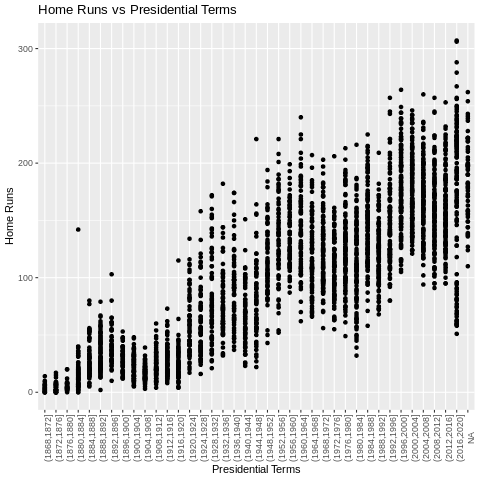

In [ ]:
%%R
#plot the presidential terms against the HRs to visualize which term had the most HRs
HR_Pres_plot <- ggplot(data = team_presterms, aes(x = election, y = HR)) +
 geom_point() +
 geom_smooth() +
 xlab("Presidential Terms") +
 ylab("Home Runs") +
#can't see the terms so rotate the terms by 90º to eliminate the text overlap on x-axis
 theme(axis.text.x = element_text(angle = 90)) +
 ggtitle("Home Runs vs Presidential Terms")
HR_Pres_plot

Based on this plot, it appears the most HRs were hit during the 2016-2020 term, which corresponds to the 45th presidential term.

Make a line plot of total home runs per season and stratify by league. Remove observations where league is missing.

`geom_smooth()` using formula = 'y ~ x'


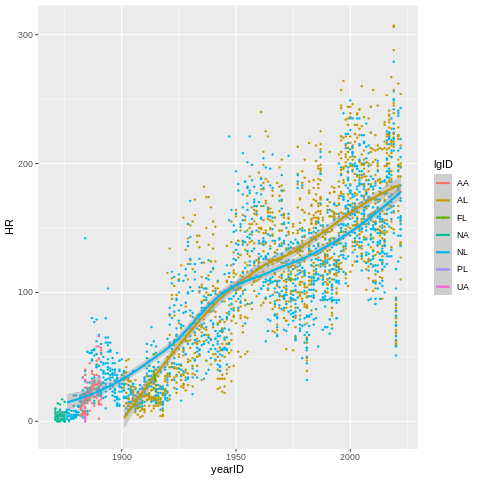

In [ ]:
%%R
teams3 <- Teams[!is.na(Teams$lgID),] %>% group_by(lgID)
teams3 %>%
 ggplot( aes(x=yearID, y=HR, group=lgID, color=lgID)) +
 geom_point(size = 0.5) +
 geom_smooth(method="loess")

Create an indicator variable called “winning record” which is defined as TRUE if the number of wins is greater than the number of losses and FALSE otherwise. Plot a scatter plot of Runs (R) vs Runs against (RA) with the color of each point showing whether that team had a winning record or not.

In [ ]:
%%R
Teams$winning_record <- ifelse(Teams$W > (Teams$L), TRUE, FALSE)
head(Teams,3)

  yearID lgID teamID franchID divID Rank  G Ghome  W  L DivWin WCWin LgWin
1   1871   NA    BS1      BNA  <NA>    3 31    NA 20 10   <NA>  <NA>     N
2   1871   NA    CH1      CNA  <NA>    2 28    NA 19  9   <NA>  <NA>     N
3   1871   NA    CL1      CFC  <NA>    8 29    NA 10 19   <NA>  <NA>     N
  WSWin   R   AB   H X2B X3B HR BB SO SB CS HBP SF  RA  ER  ERA CG SHO SV
1  <NA> 401 1372 426  70  37  3 60 19 73 16  NA NA 303 109 3.55 22   1  3
2  <NA> 302 1196 323  52  21 10 60 22 69 21  NA NA 241  77 2.76 25   0  1
3  <NA> 249 1186 328  35  40  7 26 25 18  8  NA NA 341 116 4.11 23   0  0
  IPouts  HA HRA BBA SOA   E DP    FP                    name
1    828 367   2  42  23 243 24 0.834    Boston Red Stockings
2    753 308   6  28  22 229 16 0.829 Chicago White Stockings
3    762 346  13  53  34 234 15 0.818  Cleveland Forest Citys
                          park attendance BPF PPF teamIDBR teamIDlahman45
1          South End Grounds I         NA 103  98      BOS            BS1
2      U

`geom_smooth()` using formula = 'y ~ x'


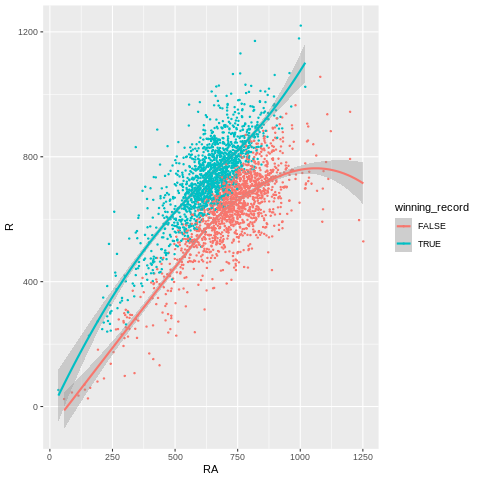

In [ ]:
%%R
Teams %>%
 ggplot( aes(x=RA, y=R, color=winning_record)) +
 geom_point(size = 0.5) +
 geom_smooth(method="loess")

Use the Batting, Pitching, and Master tables in the Lahman package to answer the following questions:

Name every player in baseball history who has accumulated at least 300 home runs (HR) and at least 300 stolen bases (SB). You can find the first and last name of the player in the Master data frame. Join this to your result along with the total home runs and total bases stolen for each of these elite players.

In [ ]:
%%R
batting2 <- Batting %>% group_by(playerID) %>%
 summarize(total_HR = sum(HR), total_SB = sum(SB)) %>%
 right_join(People, by = c("playerID" = "playerID")) %>%
 filter(total_HR >= 300 & total_SB >= 300) %>%
 select(nameFirst, nameLast, total_HR, total_SB)
batting2

# A tibble: 8 × 4
  nameFirst nameLast  total_HR total_SB
  <chr>     <chr>        <int>    <int>
1 Carlos    Beltran        435      312
2 Barry     Bonds          762      514
3 Bobby     Bonds          332      461
4 Andre     Dawson         438      314
5 Steve     Finley         304      320
6 Willie    Mays           660      338
7 Alex      Rodriguez      696      329
8 Reggie    Sanders        305      304


Similarly, name every pitcher in baseball history who has accumulated at least 300 wins (W) and at least 3,000 strikeouts (SO).

In [ ]:
%%R
pitching2 <- Pitching %>% group_by(playerID) %>%
 summarize(total_W = sum(W), total_SO = sum(SO)) %>%
 right_join(People, by = c("playerID" = "playerID")) %>%
 filter(total_W >= 300 & total_SO >= 3000) %>%
 select(nameFirst, nameLast, total_W, total_SO)
pitching2

# A tibble: 10 × 4
   nameFirst nameLast total_W total_SO
   <chr>     <chr>      <int>    <int>
 1 Steve     Carlton      329     4136
 2 Roger     Clemens      354     4672
 3 Randy     Johnson      303     4875
 4 Walter    Johnson      417     3509
 5 Greg      Maddux       355     3371
 6 Phil      Niekro       318     3342
 7 Gaylord   Perry        314     3534
 8 Nolan     Ryan         324     5714
 9 Tom       Seaver       311     3640
10 Don       Sutton       324     3574


Identify the name and year of every player who has hit at least 50 home runs in a single season. Which player had the lowest batting average in that season?

In [35]:
%%R
batting3 <- Batting %>% group_by(playerID, yearID) %>%
  summarize(total_HR = sum(HR), BA = sum(H)/sum(AB)) %>%
  right_join(People, by = c("playerID" = "playerID")) %>%
  filter(total_HR >= 50) %>%
  select(nameFirst, nameLast, yearID, total_HR, BA) %>%
  arrange(BA)
batting3

`summarise()` has grouped output by 'playerID'. You can override using the
`.groups` argument.
Adding missing grouping variables: `playerID`
# A tibble: 47 × 6
# Groups:   playerID [30]
   playerID  nameFirst nameLast yearID total_HR    BA
   <chr>     <chr>     <chr>     <int>    <int> <dbl>
 1 alonspe01 Pete      Alonso     2019       53 0.260
 2 bautijo02 Jose      Bautista   2010       54 0.260
 3 jonesan01 Andruw    Jones      2005       51 0.263
 4 marisro01 Roger     Maris      1961       61 0.269
 5 vaughgr01 Greg      Vaughn     1998       50 0.272
 6 mcgwima01 Mark      McGwire    1997       58 0.274
 7 fieldce01 Cecil     Fielder    1990       51 0.277
 8 mcgwima01 Mark      McGwire    1999       65 0.278
 9 stantmi03 Giancarlo Stanton    2017       59 0.281
10 judgeaa01 Aaron     Judge      2017       52 0.284
# ℹ 37 more rows
# ℹ Use `print(n = ...)` to see more rows


Pete Alonso had the lowest BA amongst these players.

The team IDs corresponding to Brooklyn baseball teams from the Teams data frame are listed: "BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF". Use map int() to find the number of seasons in which each of those teams played by calling a function called count seasons.

In [36]:
%%R
bk_teams <- c("BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF")

count_seasons <- function(x) {Teams %>%
    filter(teamID == x) %>%
    nrow()}

seasons <- bk_teams %>%
  map_dbl(count_seasons)
names(seasons) <- bk_teams

seasons

BR1 BR2 BR3 BR4 BRO BRP BRF 
  1   4   6   1  68   1   2 
